## Handwritten Digit Generation using GAN

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
img_rows = 28
img_cols = 28
channels = 1

# Input image dimension
img_shape = (img_rows, img_cols, channels)

# Noise vector size for generator input
z_dim = 100

In [3]:
# Implementation of generator
def build_generator(img_shape, z_dim):
    model = Sequential()
    # Fully connected layer
    model.add(Dense(128, input_dim = z_dim))
    # LeakyReLU activation function
    model.add(LeakyReLU(alpha = 0.01))
    # Output layer using tanh activation function
    model.add(Dense(28 * 28 * 1, activation = 'tanh'))
    # Reshape generator output
    model.add(Reshape(img_shape))

    return model

In [4]:
# Implementation of discriminator
def build_discriminator(img_shape):
    model = Sequential()
    # Flatten input image
    model.add(Flatten(input_shape = img_shape))
    # Fully connected layer
    model.add(Dense(128))
    # LeakyReLU activation function
    model.add(LeakyReLU(alpha = 0.01))
    # Output layer using sigmoid activation function
    model.add(Dense(1, activation = 'sigmoid'))

    return model

In [5]:
# Implementation of GAN model
def build_gan(generator, discriminator):
    model = Sequential()
    # Add generator and discriminator to the GAN model
    model.add(generator)
    model.add(discriminator)

    return model

In [6]:
# Initialize a discriminator model and compile
discriminator = build_discriminator(img_shape)
discriminator.compile(loss = 'binary_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

# Initialize a generator model
generator = build_generator(img_shape, z_dim)

# Fix discriminator parameters while generator being trained
discriminator.trainable = False

# Initialize a GAN model and compile
gan = build_gan(generator, discriminator)
gan.compile(loss = 'binary_crossentropy', optimizer = Adam())

In [7]:
# Train
losses = []
accuracies = []
iteration_checkpoints = []

def train(iterations, batch_size, sample_interval):
    # Load Mnist datasets
    (X_train, _), (_, _) = mnist.load_data()

    # Regularize [0, 255] pixel values to [-1, 1]
    X_train = X_train / 127.5 - 1.0
    X_train = np.expand_dims(X_train, axis = 3)

    # Real image : True(1)
    real = np.ones((batch_size, 1))
    # Fake image : False(0)
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):
        # Training discriminator
        # Take random batch from real image
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]
        # Generate fake image batch
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)
        # Train discriminator
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Training generator
        # Generate fake image batch
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Train generator
        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:
            # Record loss and accuracy
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Report training process
            print('%d [D Loss: %f, Accuracy: %.2f%%] [G Loss: %f]' % (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            # Print created sample image
            sample_images(generator)

In [8]:
# Print sample image
def sample_images(generator, image_grid_rows = 4, image_grid_columns = 4):
    # Random noice sampling
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))
    # Generate image from random noise
    gen_imgs = generator.predict(z)
    # Rescale image pixel to [0, 1]
    gen_imgs = 0.5 * gen_imgs + 0.5
    # Set image grid
    fig, axs = plt.subplots(image_grid_rows, image_grid_columns, figsize = (4, 4), sharey = True, sharex = True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            # Output image grid
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap = 'gray')
            axs[i, j].axis('off')
            cnt += 1

11493376/11490434 [==============================] - 0s 0us/step
1000 [D Loss: 0.134969, Accuracy: 95.31%] [G Loss: 4.427441]
2000 [D Loss: 0.102284, Accuracy: 96.88%] [G Loss: 3.790635]
3000 [D Loss: 0.186784, Accuracy: 91.80%] [G Loss: 4.077930]
4000 [D Loss: 0.154008, Accuracy: 94.53%] [G Loss: 5.470103]
5000 [D Loss: 0.245493, Accuracy: 90.62%] [G Loss: 4.077917]
6000 [D Loss: 0.172986, Accuracy: 92.19%] [G Loss: 4.920091]
7000 [D Loss: 0.171944, Accuracy: 92.97%] [G Loss: 4.667772]
8000 [D Loss: 0.351791, Accuracy: 85.55%] [G Loss: 3.472725]
9000 [D Loss: 0.345484, Accuracy: 85.55%] [G Loss: 3.768703]
10000 [D Loss: 0.259580, Accuracy: 89.06%] [G Loss: 4.126458]
11000 [D Loss: 0.531198, Accuracy: 78.91%] [G Loss: 3.364432]
12000 [D Loss: 0.375599, Accuracy: 84.38%] [G Loss: 3.525822]
13000 [D Loss: 0.384475, Accuracy: 83.59%] [G Loss: 3.427170]
14000 [D Loss: 0.384649, Accuracy: 82.81%] [G Loss: 2.987301]
15000 [D Loss: 0.396513, Accuracy: 83.20%] [G Loss: 3.067376]
16000 [D Loss:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


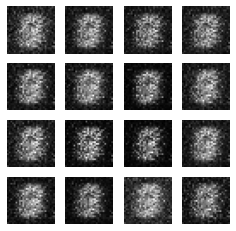

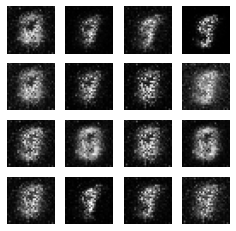

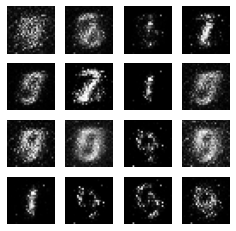

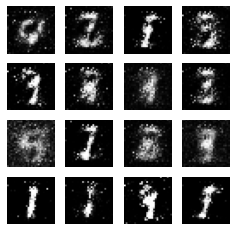

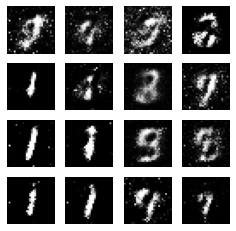

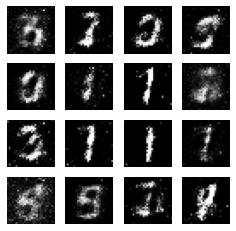

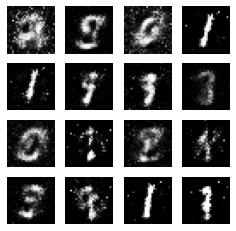

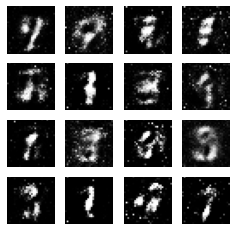

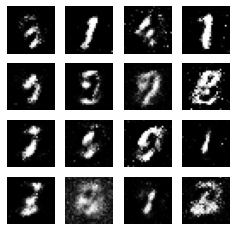

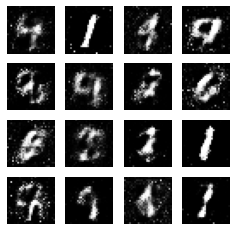

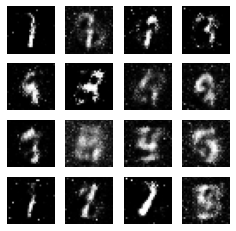

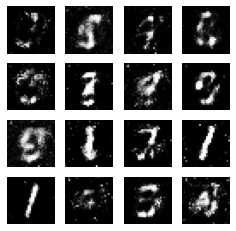

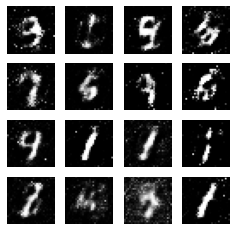

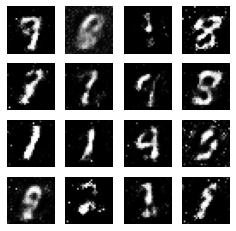

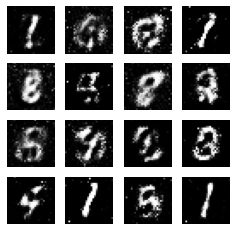

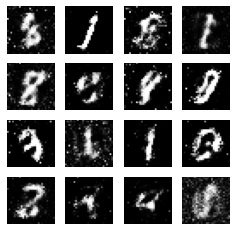

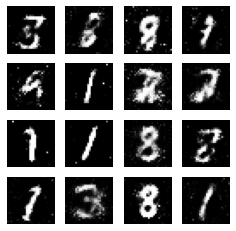

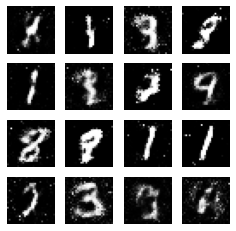

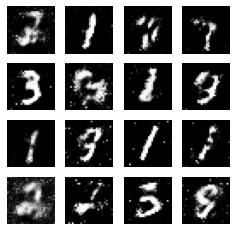

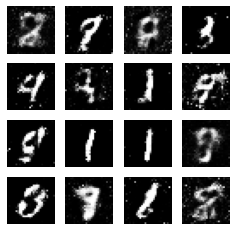

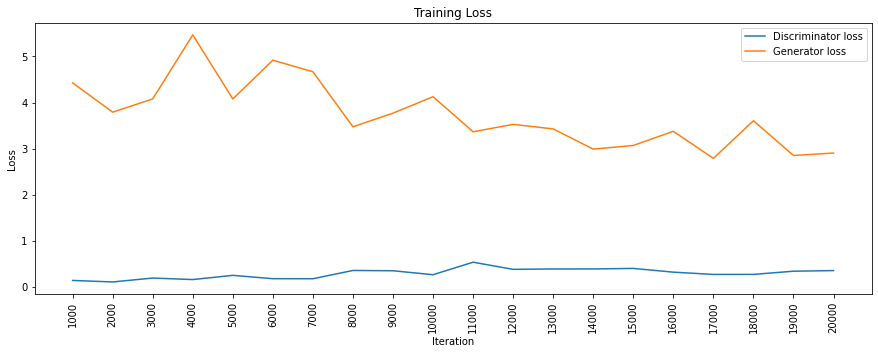

In [9]:
# Hyperparameter
iterations = 20000
batch_size = 128
sample_interval = 1000

# Train GAN model
train(iterations, batch_size, sample_interval)
# Loss array
losses = np.array(losses)

# Training loss graph of generator and discriminator
plt.figure(figsize = (15, 5))
plt.plot(iteration_checkpoints, losses.T[0], label = 'Discriminator loss')
plt.plot(iteration_checkpoints, losses.T[1], label = 'Generator loss')

plt.xticks(iteration_checkpoints, rotation = 90)

plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()